2023-04-29 20:21:58.426072: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 127.77MiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2023-04-29 20:21:58.426101: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 127.77MiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


Text(0.5, 1.0, 'img_out')

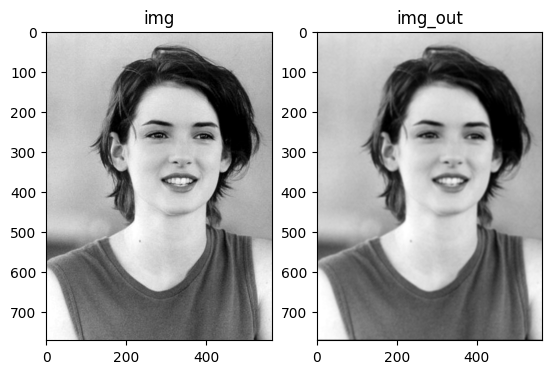

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import MaxPooling2D, Conv2D
import numpy as np
import cv2
import matplotlib.pyplot as plt

tf.test.is_gpu_available()
# Steps 2~9 (25 points)
# Enter your code here.
kernel_size=5
stride=1
padding="same"
inputs = tf.keras.Input((None, None, 1))
outputs = Conv2D(1, kernel_size, stride, padding, name="conv1")(inputs)
filter_net = tf.keras.Model(inputs=inputs, outputs=outputs)

bias=np.array([0])
weights = np.ones((kernel_size, kernel_size, 1, 1)) / kernel_size**2

filter_net.get_layer("conv1").set_weights([weights, bias])

img = cv2.imread("./Winona.jpg", cv2.IMREAD_GRAYSCALE)
img_batch = np.expand_dims(img, axis=0)
img_out = np.reshape(filter_net(img_batch), img.shape).astype(np.uint8)

fig = plt.figure(1)
plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.title("img")
plt.subplot(122)
plt.imshow(img_out, cmap="gray")
plt.title("img_out")

#[Question 1 (5 points)] If kernel_size in Steps 3 and 5 is changed from 5 to 11,
# how will img_out change (more blurry or more clear)? Why?

# [Question 1 (5 points)] If kernel_size in Steps 3 and 5 is changed from 5 to 11, how will img_out change (more blurry or more clear)? Why?

changing the kernel size from 5 to 11 makes the output image more blurry, because with kernel size 11, it took 11*11 pixels to operate convolution into one pixel, the overall pixel number is decreased. So visually, it becomes more blurry.

2023-04-29 20:47:06.138115: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 127.77MiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2023-04-29 20:47:06.138149: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 127.77MiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


Text(0.5, 1.0, 'img_out 3a-2')

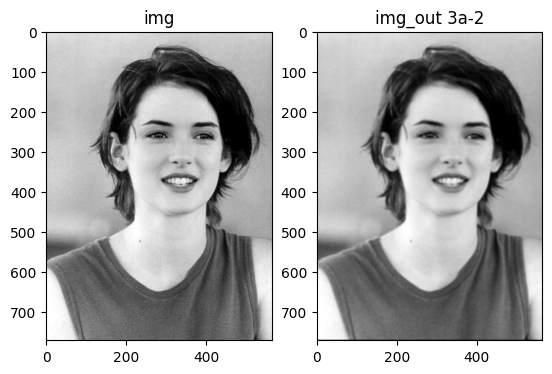

In [5]:
# Steps 10~13 (15 points)
# Enter your code here.
kernel_size=5
img = cv2.imread("./Winona.jpg", cv2.IMREAD_GRAYSCALE)
pad = int((kernel_size-1) / 2)
img_pad = np.zeros((772+2*pad, 564+2*pad))
img_pad[pad:pad+img.shape[0], pad:pad+img.shape[1]] = img

stride = 1
padding="valid"
bias = np.array([0])
weights = np.ones((kernel_size, kernel_size, 1, 1)) / kernel_size**2
outputs = Conv2D(1, kernel_size, stride, padding, name="conv1")(inputs)

img_batch = np.expand_dims(img_pad, axis=0)
filter_net = tf.keras.Model(inputs=inputs, outputs=outputs)
filter_net.get_layer("conv1").set_weights([weights, bias])

img_out = np.reshape(filter_net(img_batch), img.shape).astype(np.uint8)

fig2 = plt.figure()
plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.title("img")

plt.subplot(122)
plt.imshow(img_out, cmap="gray")
plt.title("img_out 3a-2")




# [Question 2 (5 points)] Let Step 2 to Step 9 be denoted as Method 1, and Step 10 to Step 13 be denoted as Method 2. 
# Why Methods 1 and 2 lead to the same results?

# [Question 2 (5 points)] Let Step 2 to Step 9 be denoted as Method 1, and Step 10 to Step 13 be denoted as Method 2. Why Methods 1 and 2 lead to the same results?
method 1 and 2 leads to the same result because the kernel size and stride are the same. so they basiclly run the same convolution operation.